In [2]:
# What you need to do:
#  1 Analyze min and max values of Istanbul Stock Market indexes using block maxima method (don’t forget to reconstruct all gaps)
#  2 Analyze min and max values of Istanbul Stock Market indexes using block POT method (don’t forget to prove chosen threshold)
#  3 Fit appropriate distribution for extreme values (GEV, GPD)
#  4 Find curves for VaR and ES criteria for various quantiles (0.9 – 0.999)

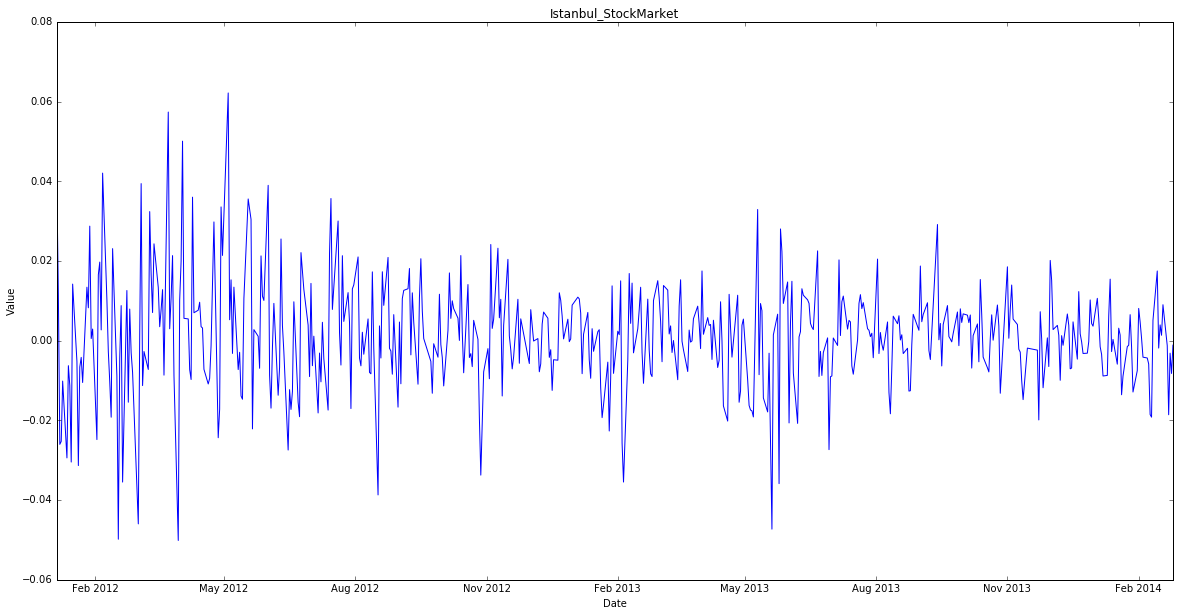

In [1]:
%matplotlib inline
import locale

import datetime
import pandas as pd
import matplotlib.pyplot as plt

def month_converter(month):
    split = str(month).split("-")
    month = split[1]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return datetime.datetime(day=int(split[0]), month=months.index(month) + 1, year=int("20"+split[2]))

locale.setlocale(locale.LC_NUMERIC, '')
data = pd.read_csv('Istanbul_StockMarket_12-14.csv', delimiter=';', names=["date", "value"])
data['value'] = data['value'].str.replace(',', '.').astype('float')
data['date'] = data['date'].apply(month_converter)

plt.figure(figsize=(20, 10))
plt.title('Istanbul_StockMarket')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(data['date'].values, data['value'].values, label="")
plt.show()

Just splitting data by groups for using block maxima method

In [45]:
N = 21
groups = []

for i in range(N-1):
    groups.append([])

i = 0
for value in data.values:
    if len(groups[i]) <= len(data)/N:
        groups[i].append(value[1])
    else:
        i += 1

# print(groups)
for group in groups:
    print(len(group))
    
print(len(groups))   


    

26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
20


Find maxs and min values by group(block)

In [56]:
maxs = []
mins = []
for group in groups:
    ma = max(group)
    mi = min(group)
    maxs.append(ma)
    mins.append(mi)
    
print(maxs)
print(mins)


          

[0.042039548, 0.039404958, 0.057358042, 0.06214589, 0.025510415, 0.030020132, 0.020885277, 0.024125737, 0.020400822, 0.013750502, 0.016848699, 0.017487054, 0.032912944, 0.022525021, 0.02047398, 0.029144062, 0.01534292, 0.020132674, 0.015433896, 0.01748247]
[-0.031339351, -0.049819602, -0.050133802, -0.022141445, -0.027442133, -0.038704133, -0.016682203, -0.033735845, -0.013886399, -0.022668952, -0.035477, -0.009802026, -0.047287145, -0.027342752, -0.008414613, -0.018347004, -0.013197401, -0.019889986, -0.008865623, -0.019187522]


Histogram for maxs values

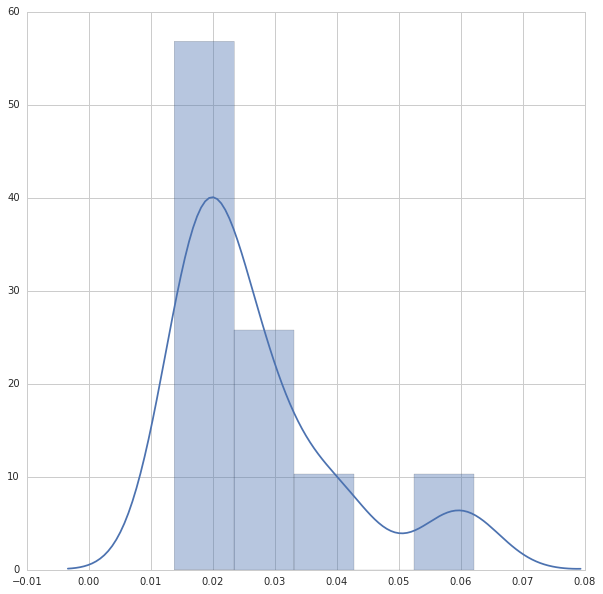

In [53]:
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))
sns.distplot(maxs,kde=True,norm_hist=True)

Histogram for mins values

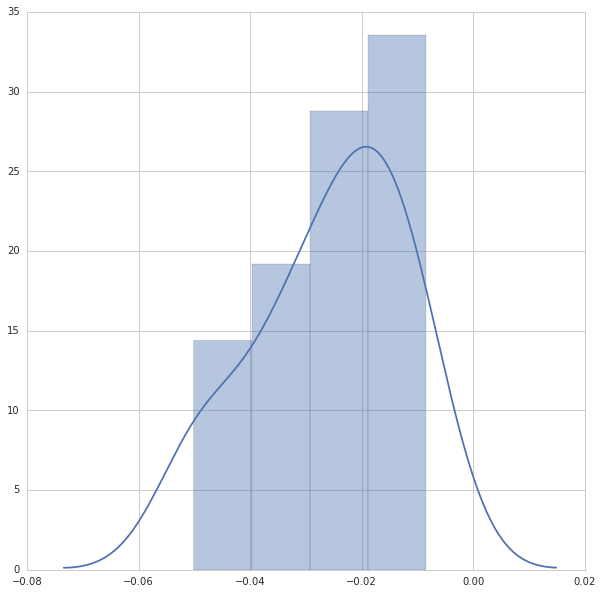

In [70]:
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))
sns.distplot(mins,kde=True,norm_hist=True)

GEV distributions fitting for maxs

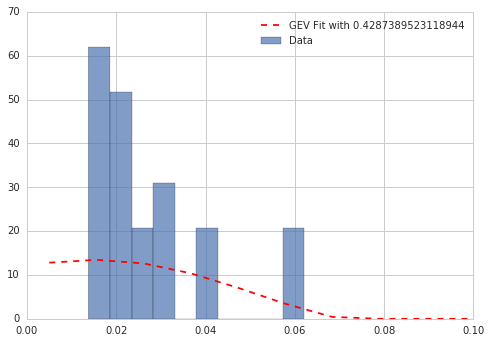

In [121]:
import numpy as np
dist = maxs
p=scipy.stats.genextreme.fit(dist, floc=0)
scipy.stats.genextreme.fit(dist, floc=0)

plt.hist(dist,  normed=True, alpha=0.7, label='Data')
plt.plot(np.linspace(5e-3, 0.1, 10),
         scipy.stats.genextreme.pdf(np.linspace(5e-3, 0.1, 10), p[0], p[1], p[2]), 'r--',
         label='GEV Fit with {}'.format(*p))
plt.legend(loc='upper right')
plt.xlim(0,0.1)
plt.show()

GEV distributions fitting for mins

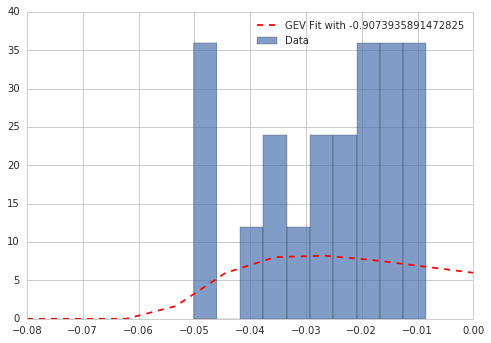

In [120]:
import numpy as np
dist = mins
p=scipy.stats.genextreme.fit(dist, floc=0)
scipy.stats.genextreme.fit(dist, floc=0)

plt.hist(dist,  normed=True, alpha=0.7, label='Data')
plt.plot(np.linspace(-0.08, 0, 10),
         scipy.stats.genextreme.pdf(np.linspace(-0.08, 0, 10), p[0], p[1], p[2]), 'r--',
         label='GEV Fit with {}'.format(*p))
plt.legend(loc='upper right')
plt.xlim(-0.08,0)
plt.show()

Peak over treshhold method

In [2]:
maxtreshhold = 0.025
mintreshhold = -0.025

maxs = []
mins = []

for value in data.values:
    if value[1] > maxtreshhold: maxs.append(value[1])
    if value[1] < mintreshhold: mins.append(value[1])
        
print("maxs = " + str(maxs))
print("mins = " + str(mins))      
        

maxs = [0.037081801, 0.028735334, 0.042039548, 0.039404958, 0.03238294, 0.057358042, 0.050058051, 0.036004612, 0.029789691, 0.033556158, 0.06214589, 0.035552449, 0.030426873, 0.038971791, 0.025510415, 0.035665794, 0.030020132, 0.032912944, 0.028030587, 0.029144062]
mins = [-0.026020036, -0.025250911, -0.029418669, -0.030457348, -0.031339351, -0.049819602, -0.035482775, -0.045974347, -0.050133802, -0.027442133, -0.038704133, -0.033735845, -0.025706335, -0.035477, -0.047287145, -0.035867381, -0.027342752]


Histogram for maxs values

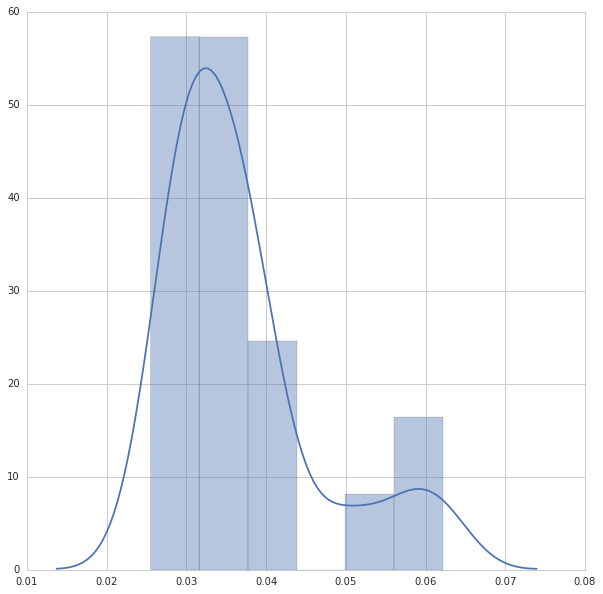

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))
sns.distplot(maxs,kde=True,norm_hist=True)

Histogram for mins values

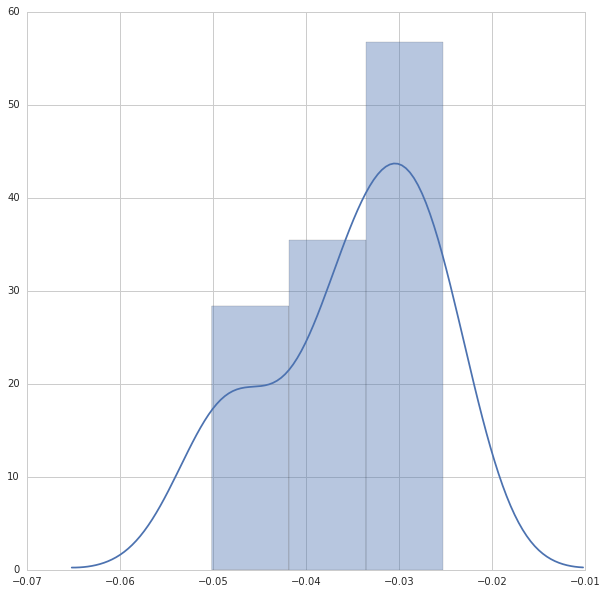

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))
sns.distplot(mins,kde=True,norm_hist=True)

GPD distributions fitting for maxs

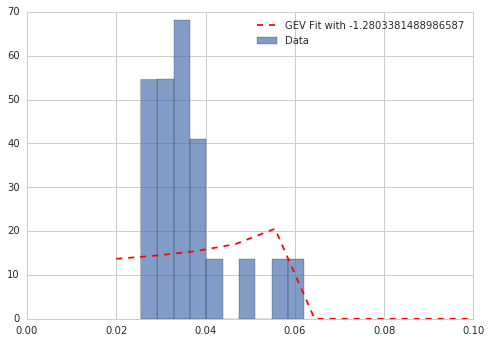

In [8]:
import numpy as np
import scipy.stats


dist = maxs
p=scipy.stats.genpareto.fit(dist, floc=0)
scipy.stats.genpareto.fit(dist, floc=0)

plt.hist(dist,  normed=True, alpha=0.7, label='Data')
plt.plot(np.linspace(0.02, 0.1, 10),
         scipy.stats.genpareto.pdf(np.linspace(0.02, 0.1, 10), p[0], p[1], p[2]), 'r--',
         label='GEV Fit with {}'.format(*p))
plt.legend(loc='upper right')
plt.xlim(0,0.1)
plt.show()

GPD distributions fitting for mins

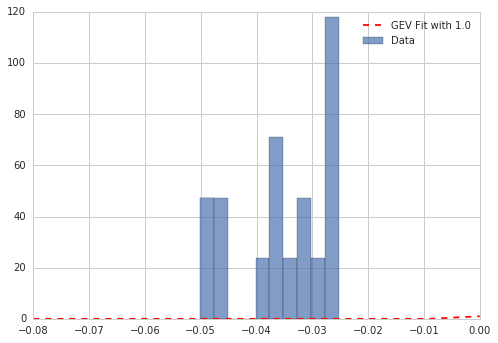

In [10]:
import numpy as np
dist = mins
p=scipy.stats.genpareto.fit(dist, floc=0)
scipy.stats.genpareto.fit(dist, floc=0)

plt.hist(dist,  normed=True, alpha=0.7, label='Data')
plt.plot(np.linspace(-0.08, 0, 10),
         scipy.stats.genpareto.pdf(np.linspace(-0.08, 0, 10), p[0], p[1], p[2]), 'r--',
         label='GEV Fit with {}'.format(*p))
plt.legend(loc='upper right')
plt.xlim(-0.08,0)
plt.show()